# Laboratorio #12
##Jhoan Londoño Restrepo
### Curso de aprendizaje estadístico

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import warnings
warnings.simplefilter("ignore")

#Obtención de la data

(1797, 64)


<Figure size 432x288 with 0 Axes>

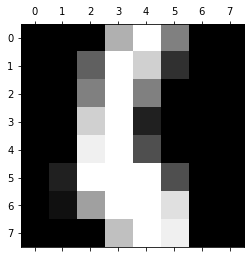

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

plt.gray()
plt.matshow(digits.images[95])
plt.show()

In [14]:
df=pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


#Contrucción del modelo

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df, digits.target, test_size=0.2, random_state=42)

rfc = RandomForestClassifier()#n_estimators=n_estimators[i], criterion="gini")

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [10,50, 100,300, 500,700], 'max_depth' : [4,5,6,7,8]}
param_test1 = {'n_estimators':range(10,1000,60), 'max_depth' : range(2,7,1)}

In [17]:
gsearch2 = GridSearchCV(estimator=rfc, 
                        param_grid = param_test1, 
                        scoring='r2', 
                        cv=5)

##Entrenamiento

In [18]:
gsearch2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 7),
                         'n_estimators': range(10, 1000, 60)},
             scoring='r2')

##Mejor estimador

In [19]:
gsearch2.best_estimator_

RandomForestClassifier(max_depth=6, n_estimators=850)

##Resultados finales

In [20]:
final_results = cross_validate(gsearch2.best_estimator_,X_train,y_train,return_train_score=True)

test_scores = final_results['test_score']
train_scores = final_results['train_score']
print("El train score es:",np.mean(train_scores))
print("El test score es:",np.mean(test_scores))

El train score es: 0.9885178037613047
El test score es: 0.9554660278745644


Como se puede observar *Random Forest* es un excelente modelo para clasificar, obteniendo scores excelentes. 

#Curvas de validación

In [23]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

In [24]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
    ):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)

    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")

    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


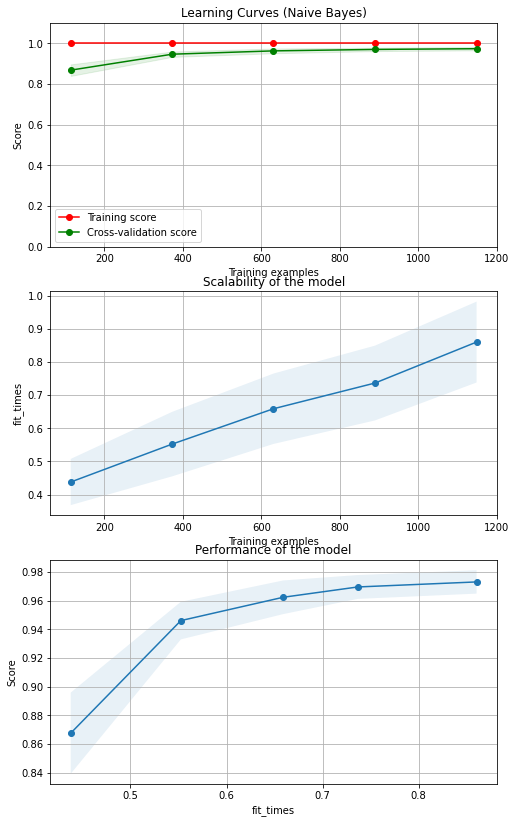

In [26]:
fig, axes = plt.subplots(3, 1, figsize=(8, 14))
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
#clf = SVC(gamma = 20.0)
#clf.fit(X_t, y)
plot_learning_curve(rfc, title, X_train, y_train, axes=axes[0:,], ylim=(0, 1.1), cv=cv, n_jobs=4)
plt.show()

#Importancia de características

In [37]:
rfc = RandomForestClassifier(n_estimators=850, max_depth =6)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=850)

In [38]:
feature_list = list(X_train.columns)
# Get numerical feature importances
importances = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable:                   21 Importance: 0.05
Variable:                   36 Importance: 0.05
Variable:                   43 Importance: 0.05
Variable:                   26 Importance: 0.04
Variable:                   28 Importance: 0.04
Variable:                   30 Importance: 0.04
Variable:                   33 Importance: 0.04
Variable:                   42 Importance: 0.04
Variable:                   10 Importance: 0.03
Variable:                   13 Importance: 0.03
Variable:                   20 Importance: 0.03
Variable:                   27 Importance: 0.03
Variable:                   34 Importance: 0.03
Variable:                   38 Importance: 0.03
Variable:                   54 Importance: 0.03
Variable:                   60 Importance: 0.03
Variable:                   61 Importance: 0.03
Variable:                    2 Importance: 0.02
Variable:                    5 Importance: 0.02
Variable:                   18 Importance: 0.02
Variable:                   19 Importanc

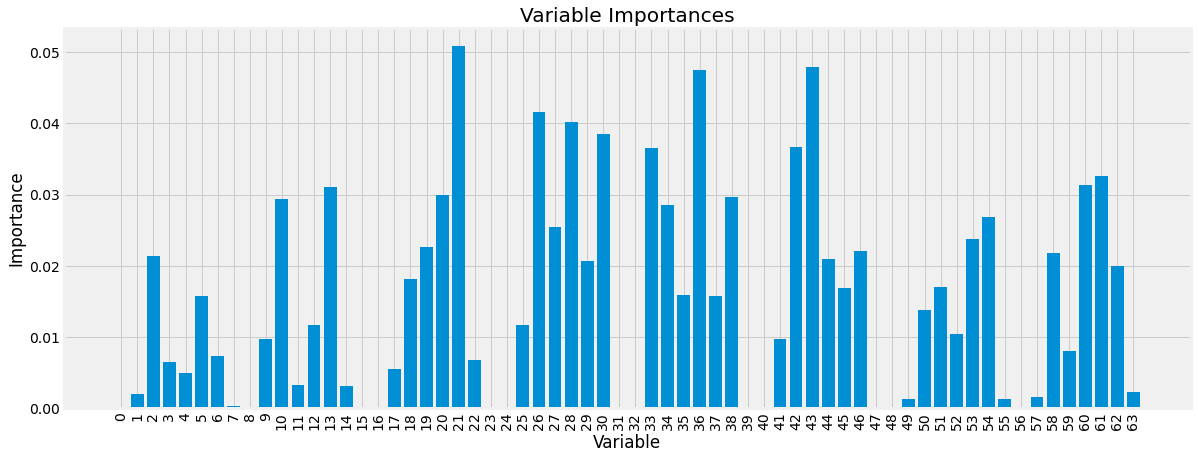

In [40]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.figure(figsize=(18,7)) 
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');